#### Things to Try
1. Try directly train classifier without Language Model fine-tuning
    - Conditioned on a given text, generate texts with fine-tuned
    - Generate again WITHOUT fine-tuned
2. Try to recover the state (Databunch, partially trained model)
3. Check out how Language Model is trained (supervised? unsupervised?)
4. Visualize latent space for different semantic (WITH v.s. WITHOUT fine-tuning)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

#### 1. Load in Data and Model (without Fine-tune)

In [6]:
bs = 48
path = untar_data(URLs.IMDB)

In [10]:
data_clas = load_data(path, 'data_clas.pkl', bs = bs)

In [11]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxup anchors xxup aweigh sees two eager young sailors , xxmaj joe xxmaj brady ( xxmaj gene xxmaj kelly ) and xxmaj clarence xxmaj doolittle / xxmaj brooklyn ( xxmaj frank xxmaj sinatra ) , get a special four - day shore leave . xxmaj eager to get to the girls , particularly xxmaj joe 's xxmaj lola , neither xxmaj joe nor xxmaj brooklyn figure on the interruption",pos
"xxbos xxmaj anyone who visited drive - ins in the 1950s , 60s , and 70s , must have seen a film or two by xxmaj american xxmaj international xxmaj pictures , a distributor that resembled 1980s giant xxmaj cannon xxmaj films . xxmaj wherever movie - goers ventured , xxup aip would be right there to supply the latest en vogue titles - in the 50s came horror movies",neg
"xxbos i have n't liked many xxup tv shows post 1990 , but xxup that xxup 70s xxup show is great . xxmaj never seeing it during it 's first run , thinking a gimmicky period piece , i was wrong ! i started watching in reruns and the more i watched , the more i liked ! xxmaj now , it is the only show xxunk xxunk that i",pos
"xxbos xxmaj around the late 1970 's , animator xxmaj don xxmaj bluth , frustrated with the output his company , xxmaj disney was churning , defected from the xxmaj mouse xxmaj house to form his own studio . xxmaj his first production , xxup the xxup secret xxup of xxup nimh , was a brilliant feature that still holds up well to this day . xxmaj this was followed",neg


In [12]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

In [13]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


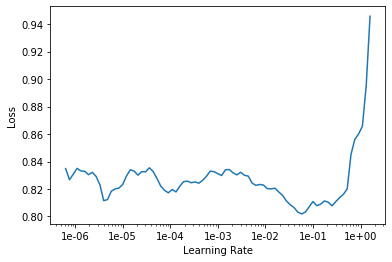

In [14]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.save('first')

In [ ]:
learn.load('first');

#### 5b. Further Fine-tune Upper Levels

In [56]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.274748,0.219594,0.914880,05:50


In [57]:
learn.save('second')

In [59]:
learn.load('second');

In [60]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.230222,0.195126,0.922160,05:46


In [61]:
learn.save('third')

In [9]:
learn.load('third');

In [10]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.199843,0.178304,0.930160,06:23
1,0.182519,0.176285,0.932280,05:45


#### 6. Inference

In [11]:
learn.predict('I like this movie very much!')

(Category pos, tensor(1), tensor([3.9855e-04, 9.9960e-01]))